# Sistema de Indicação de filmes


## 1 - Conhecendo os dados 

In [1]:
import pandas as pd
uri = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"
dados = pd.read_csv(uri)
dados.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
mapa = {
    'movieId' : 'filmeId',
    'title' : 'titulo',
    'genres' : 'generos'
}
dados.rename(columns = mapa, inplace = True)
dados.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
generos = dados.generos.str.get_dummies()
dados_dos_filmes = pd.concat([dados,generos], axis = 1)
dados_dos_filmes.head()

,filmeId,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_scaled = scaler.fit_transform(dados.generos.str.get_dummies())


In [5]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 3)
modelo.fit(generos_scaled)

print('Grupos: {}'.format(modelo.labels_)) # print(f'Grupos {modelos.labels_}')

Grupos: [1 1 2 ... 2 1 2]


https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

In [6]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.38365132 -0.25185085 -0.22152175 -0.25745212 -0.22338075
   2.57954204 -0.1977703   0.18351502 -0.24045863  0.66245806 -0.17053813
  -0.06355894 -0.15241082  0.35221296 -0.25233194 -0.25275038  0.72353067
  -0.15982454 -0.06265926]
 [-0.05917995  0.72654617  1.7708958   1.15884697  1.14955356 -0.09016619
  -0.34585718 -0.21098652 -0.55262373  0.96981393 -0.09492563 -0.23744102
   0.58790452  0.19008581 -0.10936515 -0.2693217   0.60164846 -0.16367336
  -0.03503962  0.01879096]
 [ 0.02271367 -0.21938255 -0.32886176 -0.20536567 -0.19717895  0.0577108
  -0.37463158  0.07868588  0.08442669 -0.16231455 -0.09492563  0.07952801
  -0.11265357 -0.01355447 -0.03807986  0.10042084 -0.08273198 -0.0910555
   

In [7]:
grupos = pd.DataFrame(modelo.cluster_centers_,
             columns = generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.383651,-0.251851,-0.221522,-0.257452,-0.223381,2.579542,-0.197770,0.183515,-0.240459,0.662458,-0.170538,-0.063559,-0.152411,0.352213,-0.252332,-0.252750,0.723531,-0.159825,-0.062659
1,-0.059180,0.726546,1.770896,1.158847,1.149554,-0.090166,-0.345857,-0.210987,-0.552624,0.969814,-0.094926,-0.237441,0.587905,0.190086,-0.109365,-0.269322,0.601648,-0.163673,-0.035040,0.018791
2,0.022714,-0.219383,-0.328862,-0.205366,-0.197179,0.057711,-0.374632,0.078686,0.084427,-0.162315,-0.094926,0.079528,-0.112654,-0.013554,-0.038080,0.100421,-0.082732,-0.091055,0.035091,0.006914


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f99321b0ac8>,
      dtype=object)

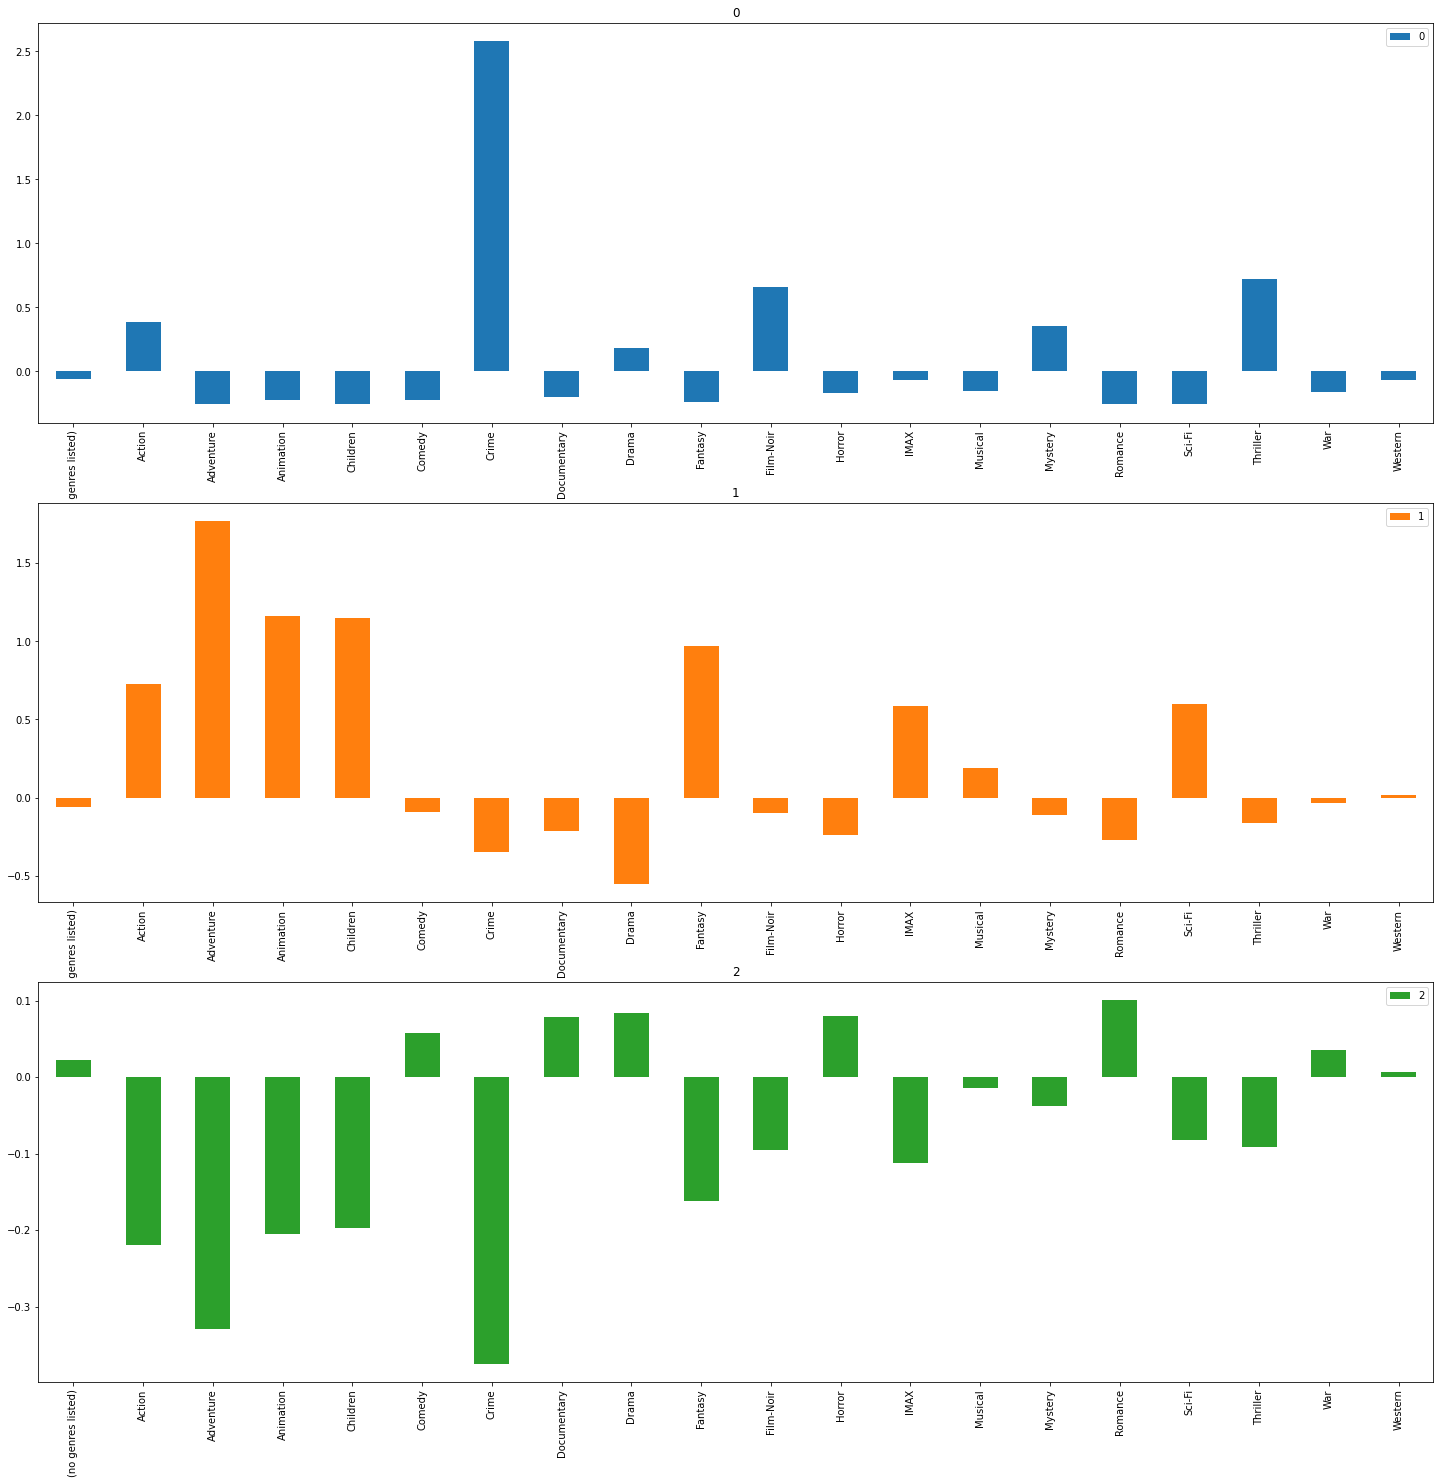

In [8]:
grupos.transpose().plot.bar(subplots=True,
                figsize = (25,25),
                sharex=False)

In [9]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filmeId,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4854,7257,"Big Bounce, The (2004)",Comedy|Crime|Thriller,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7461,81788,"Next Three Days, The (2010)",Crime|Drama|Romance|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
7392,79677,"Two Escobars, The (2010)",Crime|Documentary,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
922,1221,"Godfather: Part II, The (1974)",Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
8968,137345,That Demon Within (2014),Crime|Thriller,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1574,2112,Grand Canyon (1991),Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
8188,103137,"Bling Ring, The (2013)",Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
8100,100390,Identity Thief (2013),Comedy|Crime,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6607,55721,Elite Squad (Tropa de Elite) (2007),Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
8495,113416,Revenge of the Green Dragons (2014),Action|Crime|Drama,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


## Plotando os centroides

In [10]:
from sklearn.datasets import make_blobs

data, _ = make_blobs(n_samples = 1000,n_features = 2, random_state = 7)

data = pd.DataFrame(data, columns=['Coluna1','Coluna2'])
data.head()

,Coluna1,Coluna2
0,9.829632,0.763094
1,-9.723548,4.100788
2,10.403457,1.761671
3,-2.253417,4.660486
4,13.059859,-0.004112


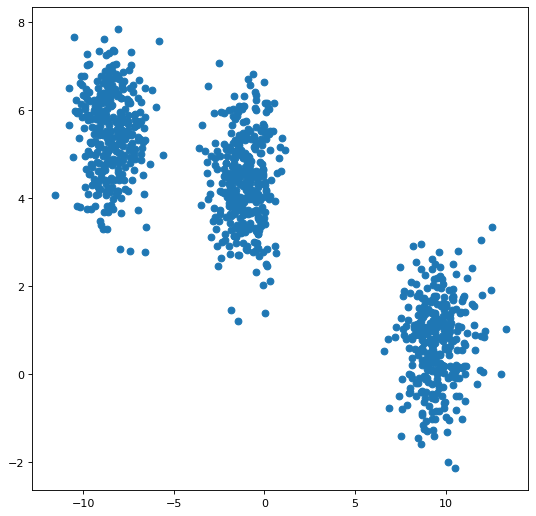

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x=data.Coluna1, y=data.Coluna2)

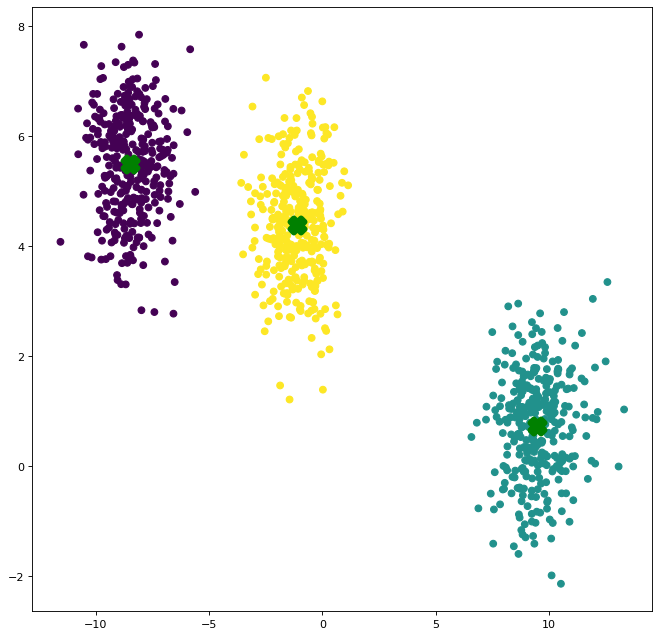

In [12]:
model = KMeans(n_clusters = 3)
grupos = model.fit_predict(data)
centroides = model.cluster_centers_
plt.figure(figsize=(10,10), dpi = 80)
plt.scatter(x=data.Coluna1, y=data.Coluna2, c=grupos, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1],
           marker='X', s=169, linewidths=5,
           color='g', zorder=8)

## Plotando os dados do filme

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE()
visualizacao = tsne.fit_transform(generos_scaled)
visualizacao

array([[ 19.43404  ,  64.47073  ],
       [ 15.00615  ,  54.440163 ],
       [-28.644917 ,   5.7495184],
       ...,
       [ -1.3680137,  24.57916  ],
       [-13.701557 , -58.04778  ],
       [ -5.7805166, -13.27807  ]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


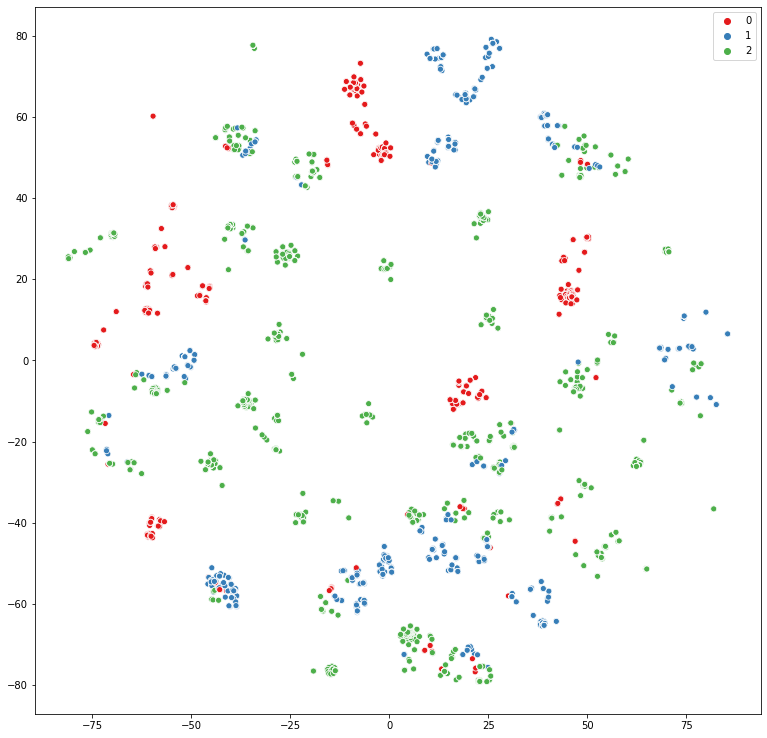

In [14]:
import seaborn as sns
plt.figure(figsize=(13,13))

sns.scatterplot(x = visualizacao[:,0] ,
                y = visualizacao[:,1],
                hue=modelo.labels_,
                palette=sns.color_palette('Set1',3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f99270219b0>,
      dtype=object)

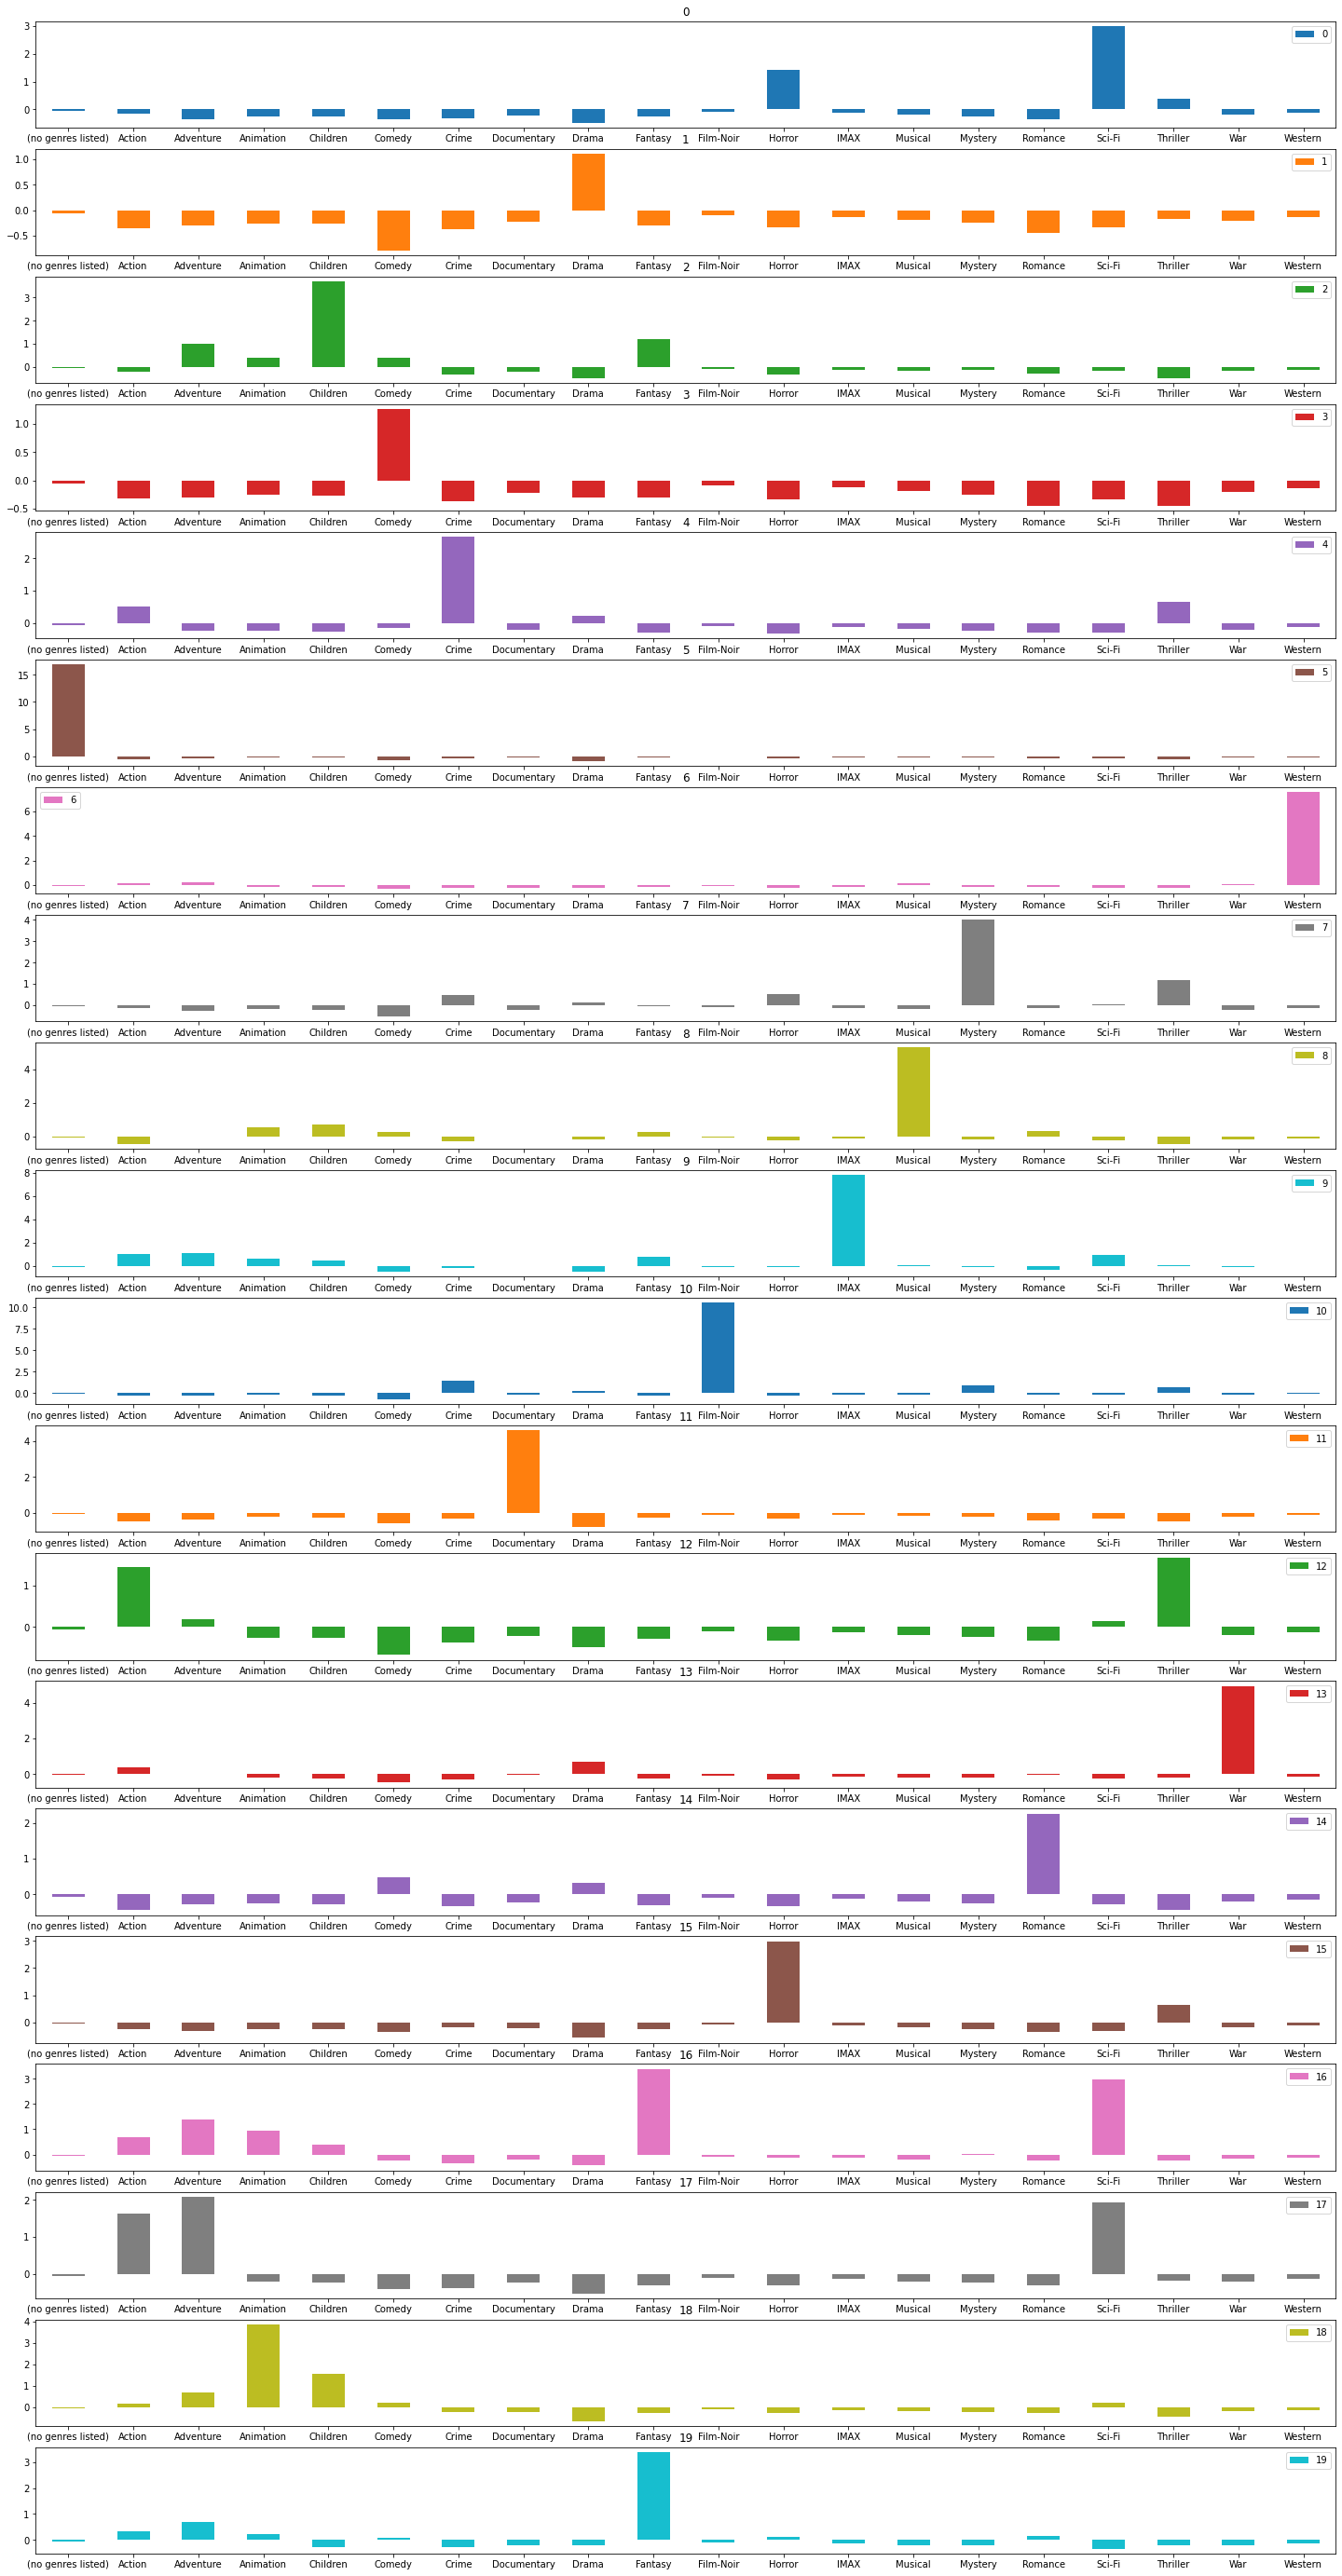

In [15]:
modelo = KMeans(n_clusters=20)
modelo.fit(generos_scaled)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns = generos.columns)
grupos.transpose().plot.bar(subplots = True, figsize = (25,50),
                            sharex=False, rot=0)

In [16]:
grupo = 3

filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(5)

,filmeId,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4532,6718,Gotcha! (1985),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6608,55729,King of California (2007),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2167,2883,Mumford (1999),Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
584,719,Multiplicity (1996),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5314,8814,Without a Paddle (2004),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters = numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [18]:
kmeans(20,generos_scaled)

[20, 54921.575724430855]

In [19]:
kmeans(3,generos_scaled)

[3, 168063.56256981674]

In [20]:
resultado = [kmeans(numero_de_grupos, generos_scaled) for numero_de_grupos in range(1,41)]
resultado

[[1, 194840.0],
 [2, 179484.00213862408],
 [3, 166364.90840241432],
 [4, 157293.61092613192],
 [5, 147476.5454685066],
 [6, 138765.08507966934],
 [7, 128092.1579399631],
 [8, 118592.20618743177],
 [9, 111059.1064605636],
 [10, 103340.1704795669],
 [11, 94126.62914639935],
 [12, 85599.82418323796],
 [13, 79305.40838486417],
 [14, 73551.48275134446],
 [15, 66840.70360133424],
 [16, 64701.809717923206],
 [17, 61162.44679766827],
 [18, 59902.00779500647],
 [19, 57096.41306792843],
 [20, 54990.98743977304],
 [21, 53321.76949643305],
 [22, 52403.11865908188],
 [23, 50803.705685976645],
 [24, 48970.75057855694],
 [25, 48422.63981424469],
 [26, 47174.192641927926],
 [27, 45700.63011681545],
 [28, 44520.59460180526],
 [29, 43536.645679473884],
 [30, 42777.29632206651],
 [31, 41684.02340829301],
 [32, 40867.08512486851],
 [33, 40042.93044003818],
 [34, 39798.358572133155],
 [35, 38951.095096120545],
 [36, 38306.11171082496],
 [37, 36887.22528923498],
 [38, 36724.09206776406],
 [39, 36112.8344808

In [0]:
resultados = pd.DataFrame(resultado,
             columns = ['grupos','inertia'])

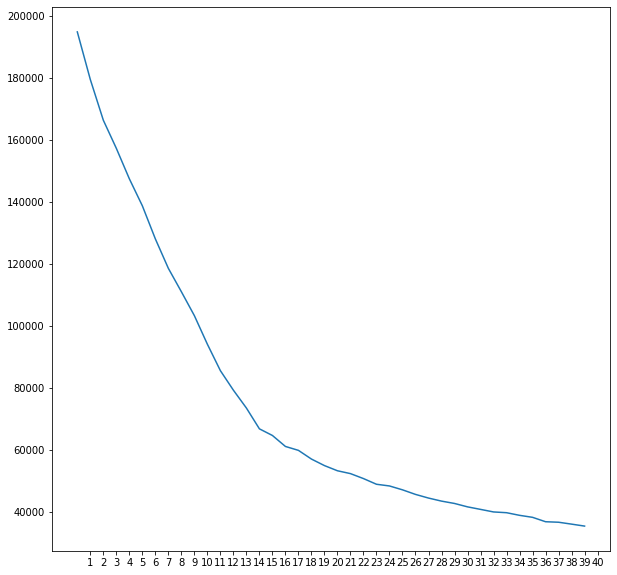

In [22]:
#elbow method
resultados.inertia.plot(figsize=(10,10), xticks=resultados.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f99261ce128>,
      dtype=object)

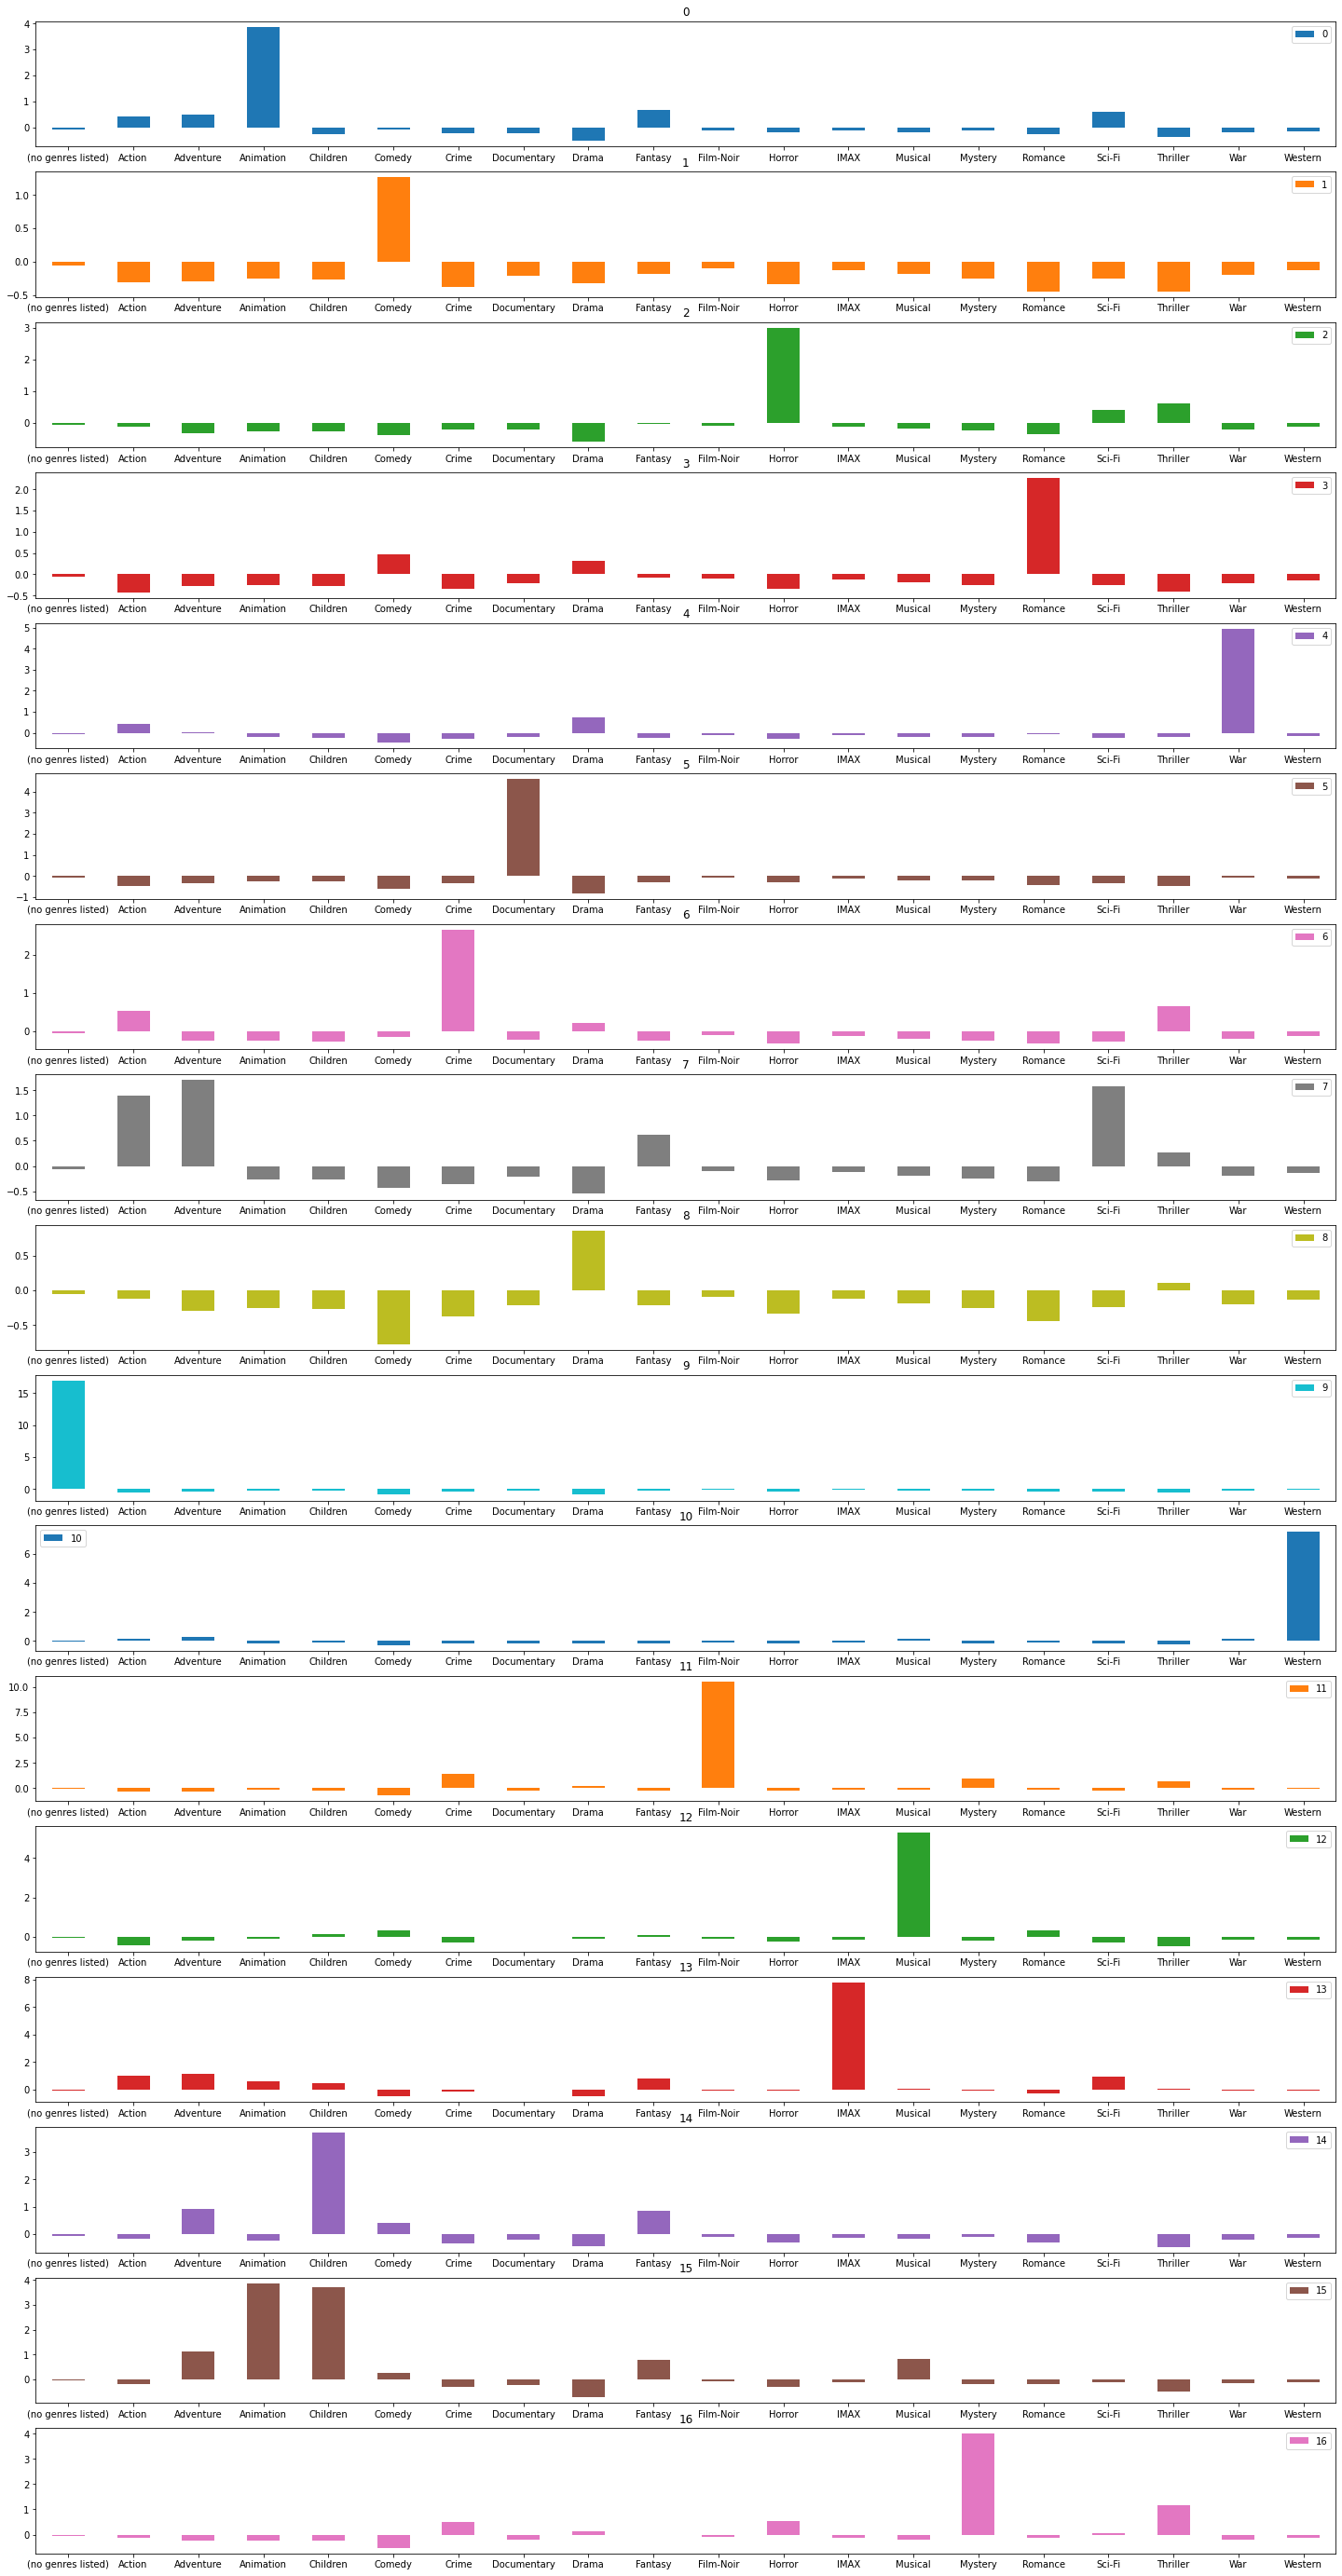

In [23]:
modelo = KMeans(n_clusters = 17)
modelo.fit(generos_scaled)
grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns = generos.columns)
grupos.transpose().plot.bar(subplots = True, figsize = (25,50),
                            sharex=False, rot=0)

In [24]:
grupo = 0

filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(5)

,filmeId,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
6965,66097,Coraline (2009),Animation|Fantasy|Thriller,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8535,115111,Ward 13 (2003),Action|Animation|Comedy|Horror,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6100,42422,Voices of a Distant Star (Hoshi no koe) (2003),Animation|Drama|Romance|Sci-Fi,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
6462,52462,Aqua Teen Hunger Force Colon Movie Film for Th...,Action|Adventure|Animation|Comedy|Fantasy|Myst...,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
8123,101142,"Croods, The (2013)",Adventure|Animation|Comedy,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
 from sklearn.cluster import AgglomerativeClustering
 #Calcula a distancia entre os generos
 modelo = AgglomerativeClustering(n_clusters = 17)
 grupos = modelo.fit_predict(generos_scaled)
 print(grupos)


[ 5 14 13 ...  2  5  3]


In [26]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_scaled)
visualizacao

array([[ -1.3774688, -61.40491  ],
       [-55.401207 , -33.622086 ],
       [ 10.296328 , -40.801888 ],
       ...,
       [ -7.64806  ,  18.871502 ],
       [-10.058301 ,  45.584568 ],
       [ 23.217684 , -13.115547 ]], dtype=float32)

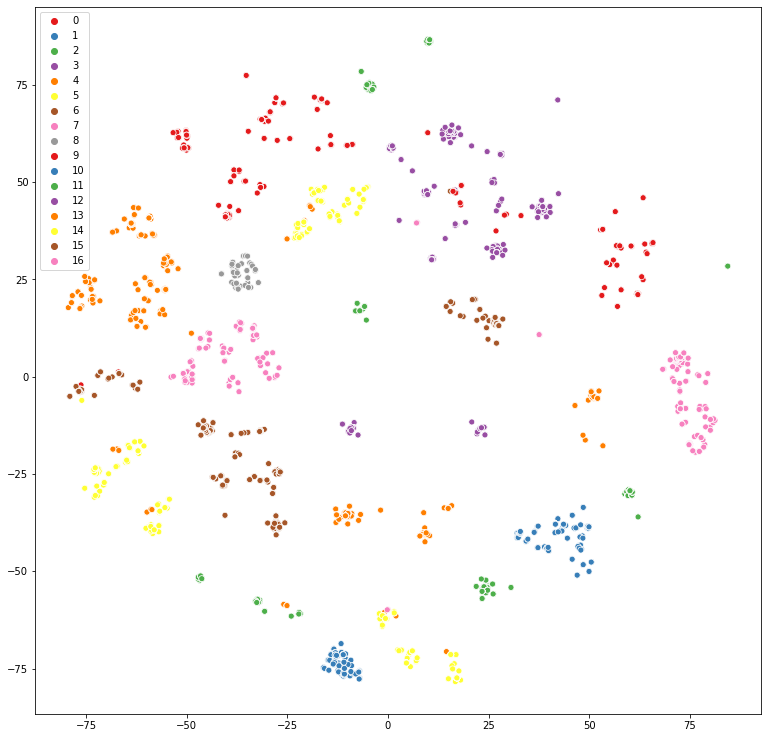

In [27]:
plt.figure(figsize=(13,13))
sns.scatterplot(x=visualizacao[:,0],
                y = visualizacao[:,1],
                hue = grupos,
                palette = sns.color_palette('Set1',17))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9925545390>,
      dtype=object)

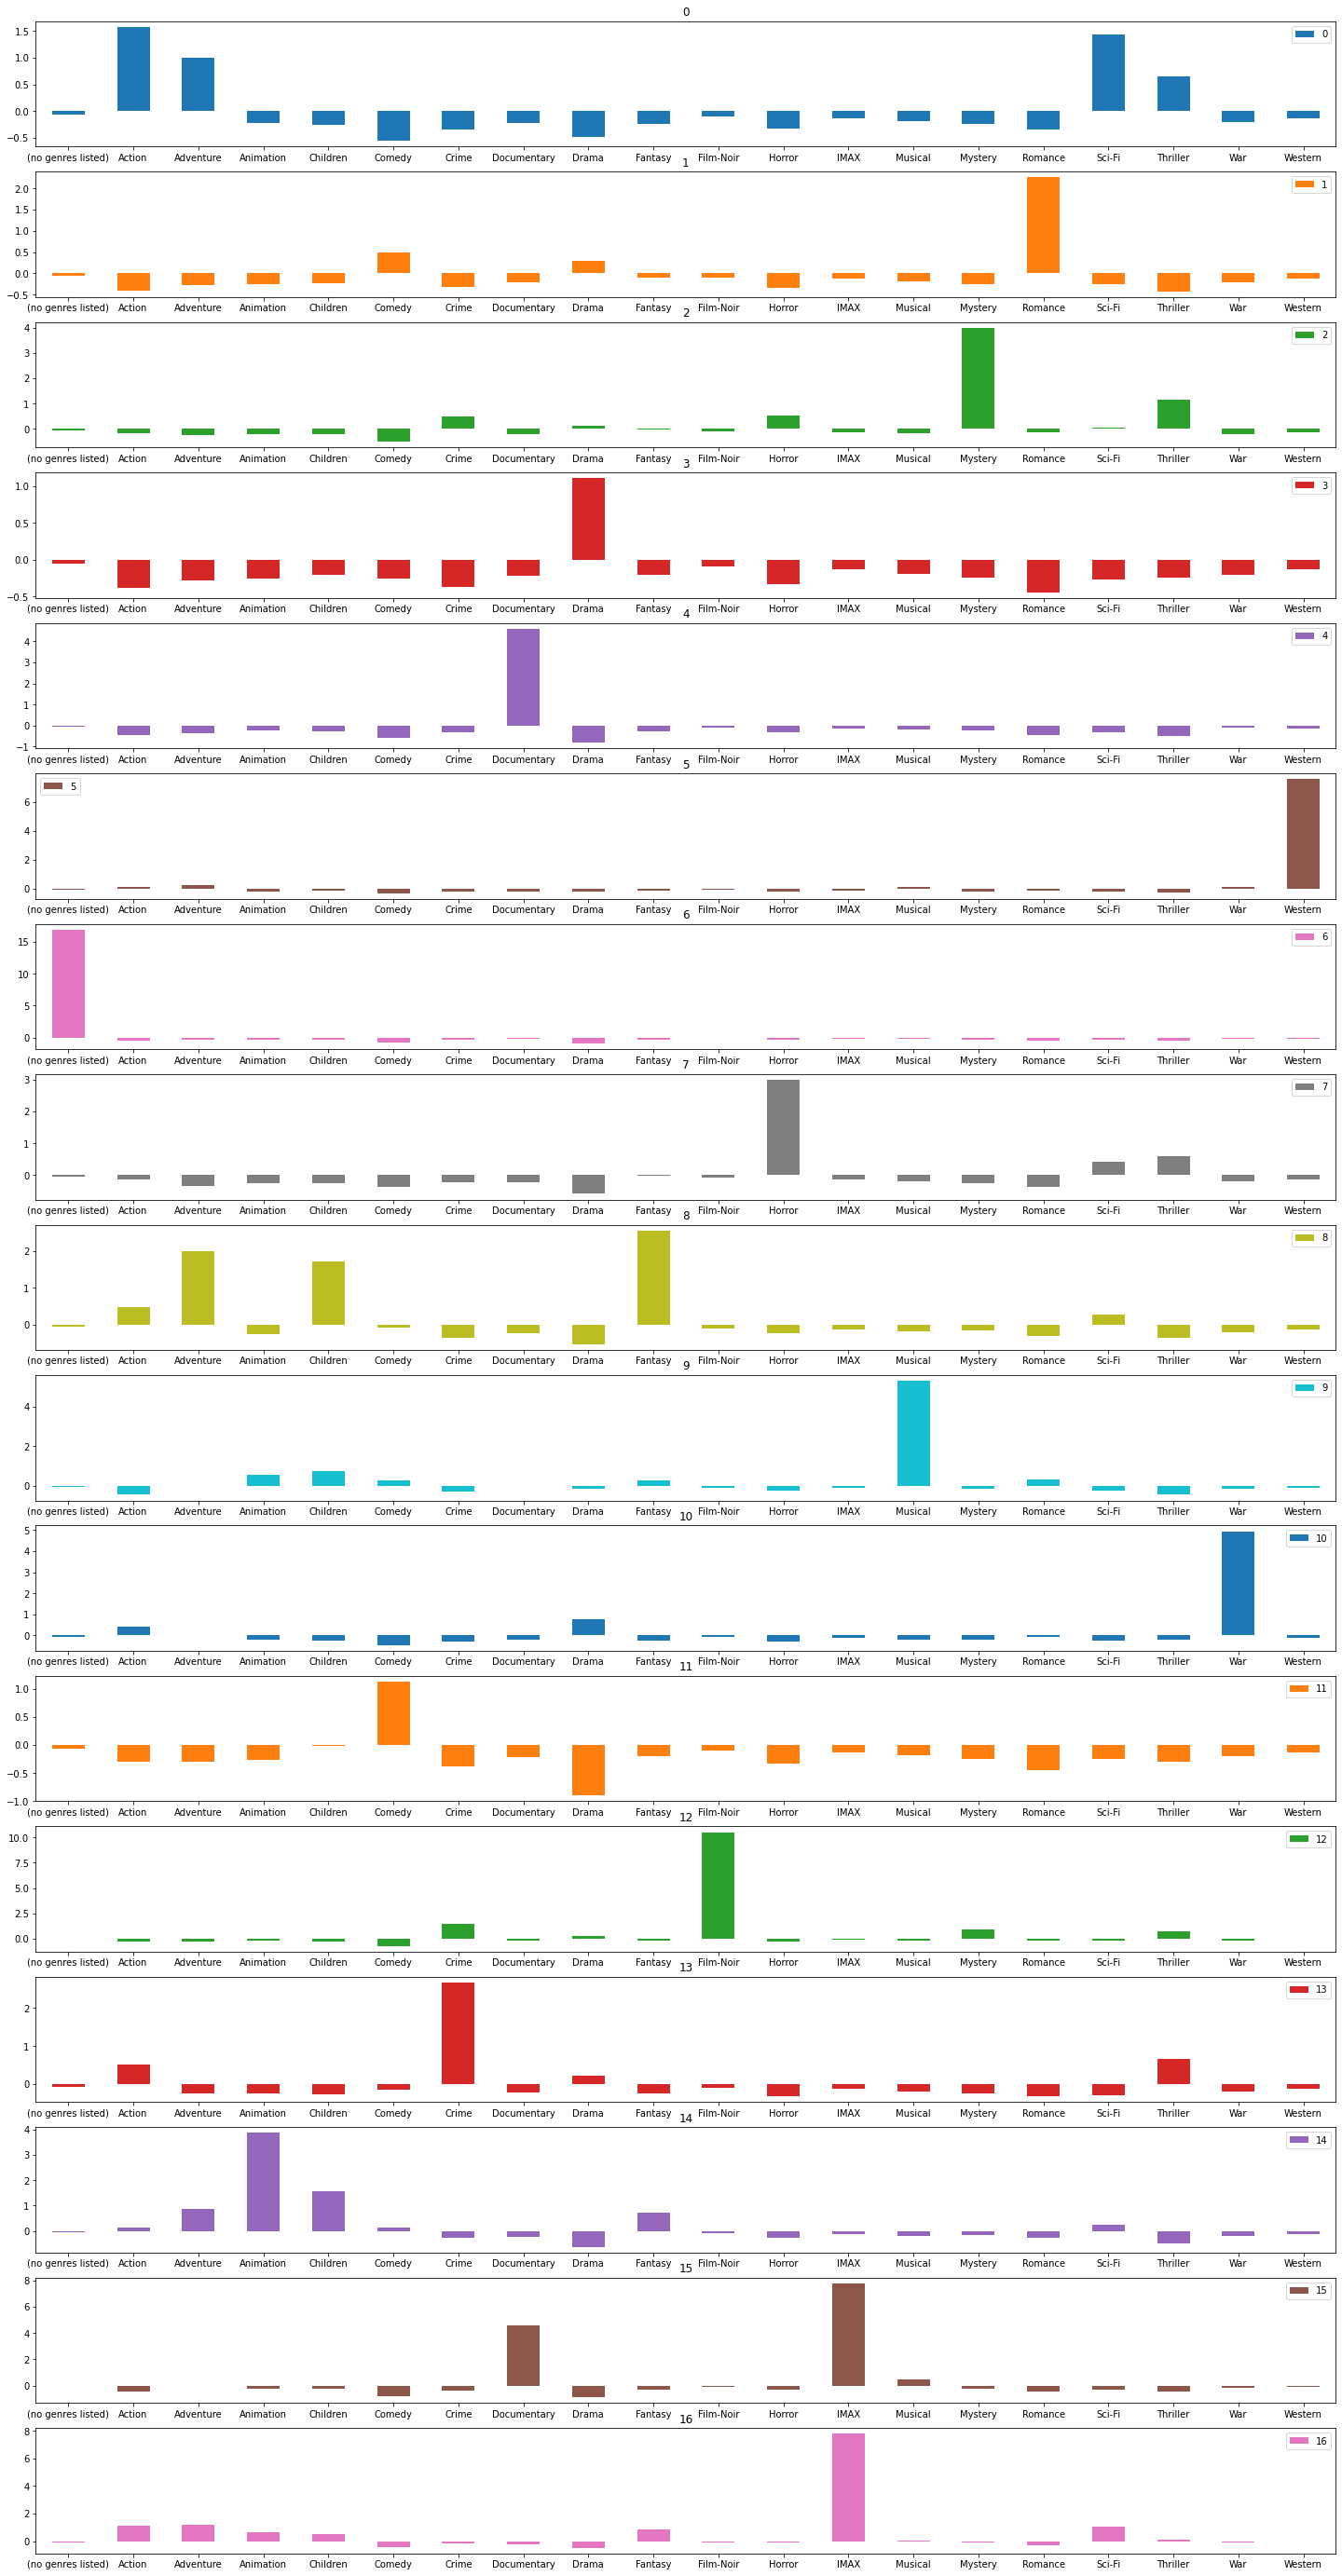

In [28]:
# Plotando um dendrograma do algoritmo hierarquico
from scipy.cluster.hierarchy import dendrogram, linkage 
modelo = KMeans(n_clusters = 17)
modelo.fit(generos_scaled)

grupos = pd.DataFrame(modelo.cluster_centers_,columns = generos.columns)

grupos.transpose().plot.bar(subplots=True,
                            figsize=(25,50),
                            sharex=False,
                            rot=0)

In [29]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 3.        , 11.        ,  2.44857614,  2.        ],
       [ 1.        , 17.        ,  2.9250132 ,  3.        ],
       [13.        , 18.        ,  3.42067244,  4.        ],
       [ 0.        , 19.        ,  3.43805832,  5.        ],
       [ 7.        , 20.        ,  3.84817275,  6.        ],
       [ 8.        , 21.        ,  4.06962688,  7.        ],
       [14.        , 22.        ,  4.6819198 ,  8.        ],
       [ 2.        , 23.        ,  4.77295793,  9.        ],
       [ 4.        , 24.        ,  5.1319529 , 10.        ],
       [10.        , 25.        ,  5.25460574, 11.        ],
       [15.        , 16.        ,  5.73807226,  2.        ],
       [ 9.        , 26.        ,  5.80461952, 12.        ],
       [ 5.        , 28.        ,  7.87367648, 13.        ],
       [27.        , 29.        ,  7.95795034, 15.        ],
       [12.        , 30.        , 10.816343  , 16.        ],
       [ 6.        , 31.        , 17.06989387, 17.        ]])

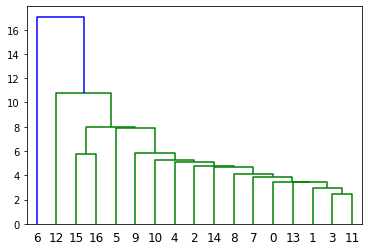

In [30]:
dendrograma = dendrogram(matriz_de_distancia)